# Geographic vs projected coordinates
The CRS attribute stores the information about the Coordinate Reference System in which the data is represented. In this exercises, we will explore the CRS and the coordinates of the districts dataset about the districts of Paris.

- Look at the CRS attribute of the GeoDataFrame. Do you recognize the EPSG number?
- Look at the values of the coordinates. What is the range, and what are the differences between different points? Can this be meters, or are it degrees?

### Question
What kind of coordinates are used in the geometry column of the districts dataset: geographic or projected coordinates?

Possible Answers
- Geographic coordinates (in degrees)
- Projected coordinates (in meters)
- Projected coordinates (in feet)

In [1]:
import geopandas
import matplotlib.pyplot as plt
import pyproj

# Import the districts dataset
districts = geopandas.read_file("../data/paris_districts_utm.geojson")

# Print the CRS information
print(districts.crs)

# Print the first rows of the GeoDataFrame
print(districts.head())

{'init': 'epsg:4326'}
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  


# Projecting a GeoDataFrame
The Paris districts dataset is provided in geographical coordinates (longitude/latitude in WGS84). To see the result of naively using the data as is for plotting or doing calculations, we will first plot the data as is, and then plot a projected version.

The standard projected CRS for France is the RGF93 / Lambert-93 reference system (referenced by the EPSG:2154 number).

GeoPandas and matplotlib have already been imported, and the districts dataset is read and assigned to the districts variable.

- Print the CRS of the districts dataset.
- Make a simple plot of the districts dataset.
- Convert the districts to a projected CRS (using the EPSG:2154 for France). Call the new dataset districts_RGF93.
- Make a similar plot of districts_RGF93.

{'init': 'epsg:4326'}


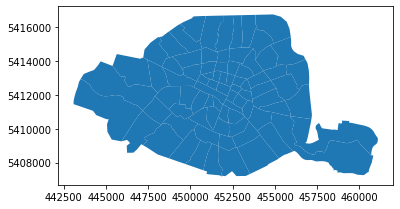

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


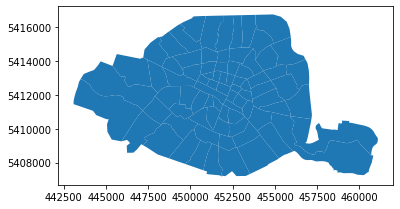

In [18]:
# Print the CRS information
print(districts.crs)

# Plot the districts dataset
districts.plot()
plt.show()

# Convert the districts to the RGF93 reference system
districts_RGF93 = districts.to_crs(epsg=4326)

# Plot the districts dataset again
districts_RGF93.plot()
plt.show()

# Projecting a Point
In the previous chapter, we worked with the Eiffel Tower location. Again, we provided you the coordinates in a projected coordinate system, so you could, for example, calculate distances. Let's return to this iconic landmark, and express its location in geographical coordinates: 48°51′29.6″N, 2°17′40.2″E. Or, in decimals: latitude of 48.8584 and longitude of 2.2945.

Shapely geometry objects have no notion of a CRS, and thus cannot be directly converted to another CRS. Therefore, we are going to use the GeoPandas to transform the Eiffel Tower point location to an alternative CRS. We will put the single point in a GeoSeries, use the to_crs() method, and extract the point again.

GeoPandas is already imported.

- Create a shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called eiffel_tower.
- Create a GeoSeries (called s_eiffel_tower) with the Eiffel Tower as the single element and specify the CRS to be EPSG:4326.
- Convert s_eiffel_tower to EPSG:2154, and call the result s_eiffel_tower_projected

In [19]:
# Construct a Point object for the Eiffel Tower
from shapely.geometry import Point
eiffel_tower = Point(2.2945, 48.8584)

# Put the point in a GeoSeries with the correct CRS
s_eiffel_tower = geopandas.GeoSeries([eiffel_tower], crs={'init': 'epsg:4326'})

# Convert to other CRS
s_eiffel_tower_projected = s_eiffel_tower.to_crs(epsg=2154)

# Print the projected point
print(s_eiffel_tower_projected)

0    POINT (648237.302 6862271.682)
dtype: geometry


C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


# Calculating distance in a projected CRS
Now we have the Eiffel Tower location in a projected coordinate system, we can calculate the distance to other points.

The final s_eiffel_tower_projected of the previous exercise containing the projected Point is already provided, and we extract the single point into the eiffel_tower variable. Further, the restaurants dataframe (using WGS84 coordinates) is also loaded.

- Convert the restaurants to the same CRS as the Eiffel Tower point. For this exercise, don't specify the epsg keyword, but make use of the .crs attribute.
- Calculate the distance for all restaurants to the Eiffel Tower.
- Print the smallest distance.

In [25]:
restaurants = geopandas.read_file("../data/paris_restaurants.csv")
restaurants.x = restaurants.x.astype('float')
restaurants.y = restaurants.y.astype('float')
restaurants.geometry = geopandas.points_from_xy(restaurants.x, restaurants.y)

# Extract the single Point
eiffel_tower = s_eiffel_tower_projected[0]

# Ensure the restaurants use the same CRS
restaurants = restaurants.to_crs(s_eiffel_tower_projected.crs)

# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

CRSError: Invalid projection: : (Internal Proj Error: proj_create: unrecognized format / unknown name)

In [27]:
restaurants.to_crs(s_eiffel_tower_projected.crs)

CRSError: Invalid projection: : (Internal Proj Error: proj_create: unrecognized format / unknown name)

In [26]:
s_eiffel_tower_projected.crs

{'init': 'epsg:2154', 'no_defs': True}